In [148]:
# Dependencies and Setup
import sqlite3
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.options.display.max_columns = None

In [149]:
# Create/connect to a SQLite database
# connection = sqlite3.connect('../Resources/glassdoor_jobs.sqlite')
connection = sqlite3.connect('C:\A_Sheena\Cyber\Module_16Pj3\Project_3\Resources\glassdoor_jobs.sqlite')

In [150]:
# # Connect to a SQLite database
# # connection = sqlite3.connect('..//Resources//glassdoor_jobs.sqlite')
# connection = sqlite3.connect('C:\A_Sheena\Cyber\Module_16Pj3\Project_3\Resources\glassdoor_jobs.sqlite')
# query = "SELECT * FROM glassdoor"
# glassdoor = pd.read_sql_query(query, connection)


In [151]:
# Verify
print(glassdoor.columns)


Index(['job_state', 'job_region', 'Sector', 'Company_Age', 'Avg_Company_Size',
       'Job_Title', 'Avg_Salary', 'Max_Salary', 'Usr_Rating', 'Python_y_n',
       'R_y_n', 'Spark_y_n', 'AWS_y_n', 'Excel_y_n'],
      dtype='object')


### Visual Data Exploration

In [152]:
# list(glassdoor.columns)
glassdoor.head()

,job_state,job_region,Sector,Company_Age,Avg_Company_Size,Job_Title,Avg_Salary,Max_Salary,Usr_Rating,Python_y_n,R_y_n,Spark_y_n,AWS_y_n,Excel_y_n
0,NM,Southwest,Aerospace & Defense,47,750,Data Scientist,72.0,91,3.8,1,0,0,0,1
1,MD,Northeast,Health Care,36,10000,Data Scientist,87.5,112,3.4,1,0,0,0,0
2,FL,Southeast,Business Services,10,750,Data Scientist,85.0,90,4.8,1,0,1,0,1
3,WA,West,"Oil, Gas, Energy & Utilities",55,3000,Data Scientist,76.5,97,3.8,1,0,0,0,0
4,NY,Northeast,Business Services,22,125,Data Scientist,114.5,143,2.9,1,0,0,0,1


In [153]:
glassdoor.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 742 entries, 0 to 741
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   job_state         742 non-null    object 
 1   job_region        742 non-null    object 
 2   Sector            742 non-null    object 
 3   Company_Age       742 non-null    int64  
 4   Avg_Company_Size  742 non-null    object 
 5   Job_Title         742 non-null    object 
 6   Avg_Salary        742 non-null    float64
 7   Max_Salary        742 non-null    int64  
 8   Usr_Rating        742 non-null    float64
 9   Python_y_n        742 non-null    int64  
 10  R_y_n             742 non-null    int64  
 11  Spark_y_n         742 non-null    int64  
 12  AWS_y_n           742 non-null    int64  
 13  Excel_y_n         742 non-null    int64  
dtypes: float64(2), int64(7), object(5)
memory usage: 81.3+ KB


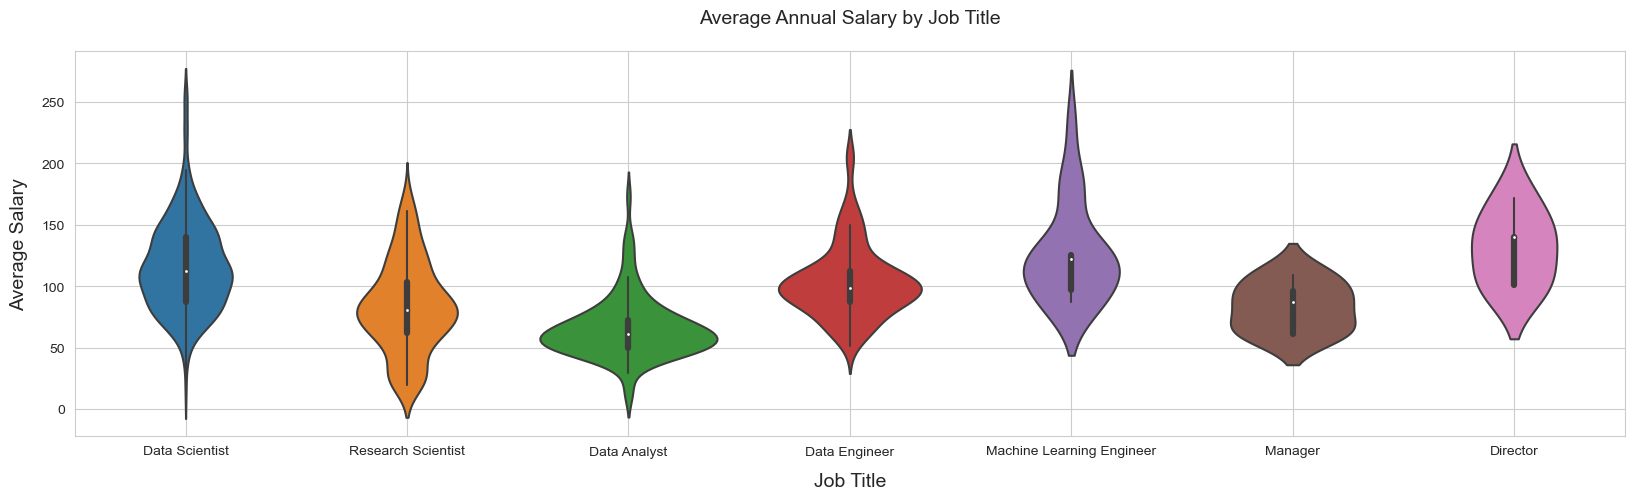

In [154]:
# ['job_state', 'job_region', 'Sector', 'Company_Age', 'Avg_Company_Size', 'Job_Title', 'Avg_Salary', 
# 'Max_Salary', 'Usr_Rating', 'Python_y_n', 'R_y_n', 'Spark_y_n', 'AWS_y_n', 'Excel_y_n']
    
plt.figure(figsize=(20,5))
sns.violinplot(x = "Job_Title", y = "Avg_Salary", data = glassdoor)

plt.title("Average Annual Salary by Job Title", fontsize=14, pad=20)
plt.xlabel("Job Title", fontsize=14, labelpad=10)
plt.ylabel("Average Salary", fontsize=14, labelpad=10)
plt.grid(True)
plt.savefig("..//Output_data//Fig1.png")
# plt.savefig("C:\A_Sheena\Cyber\Module_16Pj3\Project_3\Output_data\Fig1.png")
plt.show()

Index(['Company_Age', 'Avg_Salary', 'Max_Salary', 'Usr_Rating'], dtype='object') 



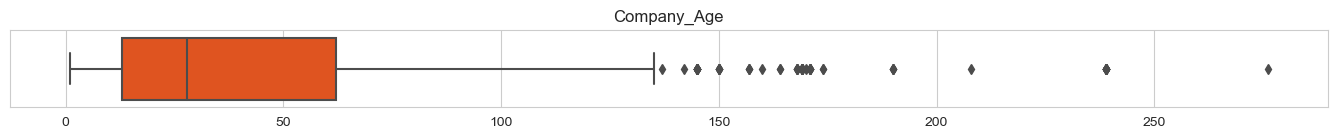

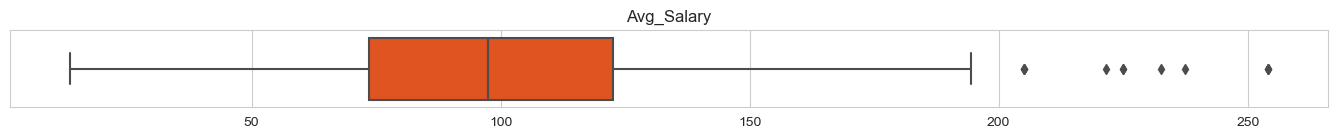

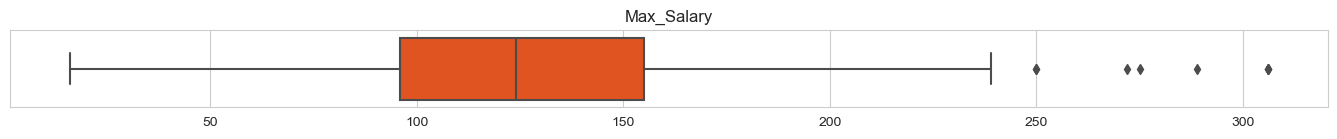

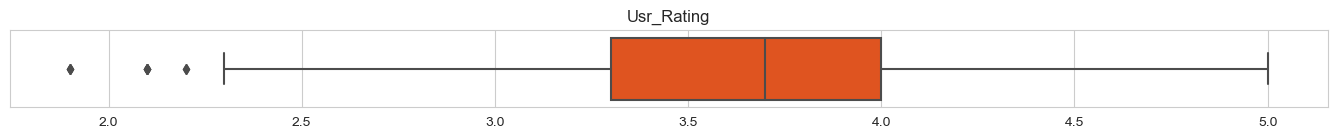

In [155]:
# ['job_state', 'job_region', 'Sector', 'Company_Age', 'Avg_Company_Size', 'Job_Title', 'Avg_Salary', 
# 'Max_Salary', 'Usr_Rating', 'Python_y_n', 'R_y_n', 'Spark_y_n', 'AWS_y_n', 'Excel_y_n']

glassdoor_numeric = glassdoor.select_dtypes(exclude = ['object'])

exclude_lang = ['Python_y_n', 'R_y_n', 'Spark_y_n', 'AWS_y_n', 'Excel_y_n']
glassdoor_numeric = glassdoor_numeric.drop(columns = exclude_lang, axis=1)

print(glassdoor_numeric.columns, '\n')

for i, column in enumerate(glassdoor_numeric.columns):
    
    col_min = glassdoor_numeric[column].min()
    # print(f'{column}(min): {col_min}')
    
    mask = glassdoor_numeric.query(f'{column} > 0')
    if not mask.empty:
        fig_num = i + 1
        plt.figure(figsize=(17, 1))
        sns.boxplot(data = mask, x = column, color = 'orangered')
        plt.title(column)
        plt.xlabel('')
        plt.show


{'Media': 116.7, 'Accounting & Legal': 113.5, 'Information Technology': 113.0, 'Biotech & Pharmaceuticals': 112.3, 'Insurance': 105.9, 'Real Estate': 104.8, 'Mining & Metals': 104.0, 'Telecommunications': 102.3, 'Education': 100.7, 'Consumer Services': 99.9, 'Retail': 99.7, 'Transportation & Logistics': 99.3, 'Aerospace & Defense': 99.1, 'Business Services': 97.7, 'Finance': 97.4, 'Manufacturing': 84.0, 'Oil, Gas, Energy & Utilities': 80.5, 'Agriculture & Forestry': 80.5, 'Government': 78.5, 'Travel & Tourism': 69.5, 'Non-Profit': 68.6, 'Health Care': 68.2, 'Arts, Entertainment & Recreation': 48.5, 'Construction, Repair & Maintenance': 26.5} 



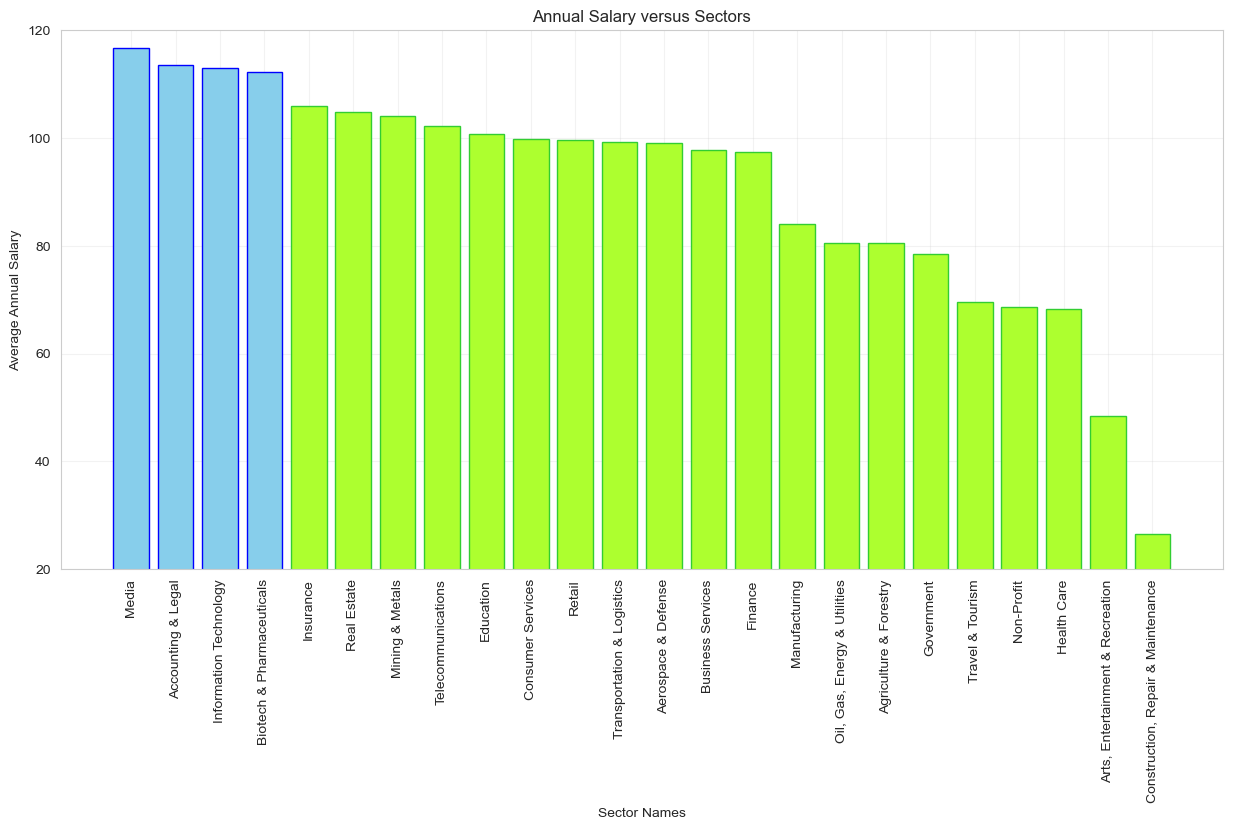

In [156]:
# ['job_state', 'job_region', 'Sector', 'Company_Age', 'Avg_Company_Size', 'Job_Title', 'Avg_Salary', 
# 'Max_Salary', 'Usr_Rating', 'Python_y_n', 'R_y_n', 'Spark_y_n', 'AWS_y_n', 'Excel_y_n']

avg_sal = round(glassdoor.groupby('Sector')['Avg_Salary'].mean(), 1)  # Create dictionary (below) for y-axis values
cat_names = glassdoor['Sector'].unique()  # Create dictionary (below) for x-axis values

Sector_Sal = {cat: (avg_sal[cat]) for cat in cat_names}
# print(Sector_Sal)
sorted_Sector_Sal = {r: Sector_Sal[r] for r in sorted(Sector_Sal, key=Sector_Sal.get, reverse=True)}
print(sorted_Sector_Sal, '\n')

plt.rcParams["figure.figsize"] = (15,7)
plt.bar(sorted_Sector_Sal.keys(), sorted_Sector_Sal.values(), color = 'greenyellow', edgecolor = 'limegreen')

# Color the top 4 bars in blue
for i, bar in enumerate(plt.gca().patches):
    if i < 4 and bar.get_height() > 110:
        # bar.set_color('green')
        bar.set_facecolor('skyblue')
        bar.set_edgecolor('blue')

plt.grid(True, alpha = 0.25)
plt.xlabel("Sector Names")
plt.ylabel("Average Annual Salary")
plt.ylim(ymin = 20, ymax = 120)

plt.title("Annual Salary versus Sectors")
plt.xticks(rotation=90)

plt.savefig("..//Output_data//Fig3.png")
# plt.savefig("C:\A_Sheena\Cyber\Module_16Pj3\Project_3\Output_data\Fig3.png")
plt.show()

{'Information Technology': 182, 'Biotech & Pharmaceuticals': 119, 'Business Services': 97, 'Insurance': 69, 'Health Care': 50, 'Finance': 42, 'Manufacturing': 34, 'Aerospace & Defense': 25, 'Education': 23, 'Retail': 15, 'Oil, Gas, Energy & Utilities': 14, 'Government': 11, 'Non-Profit': 9, 'Real Estate': 8, 'Transportation & Logistics': 8, 'Travel & Tourism': 8, 'Media': 6, 'Telecommunications': 6, 'Arts, Entertainment & Recreation': 4, 'Consumer Services': 4, 'Mining & Metals': 3, 'Construction, Repair & Maintenance': 3, 'Agriculture & Forestry': 1, 'Accounting & Legal': 1} 



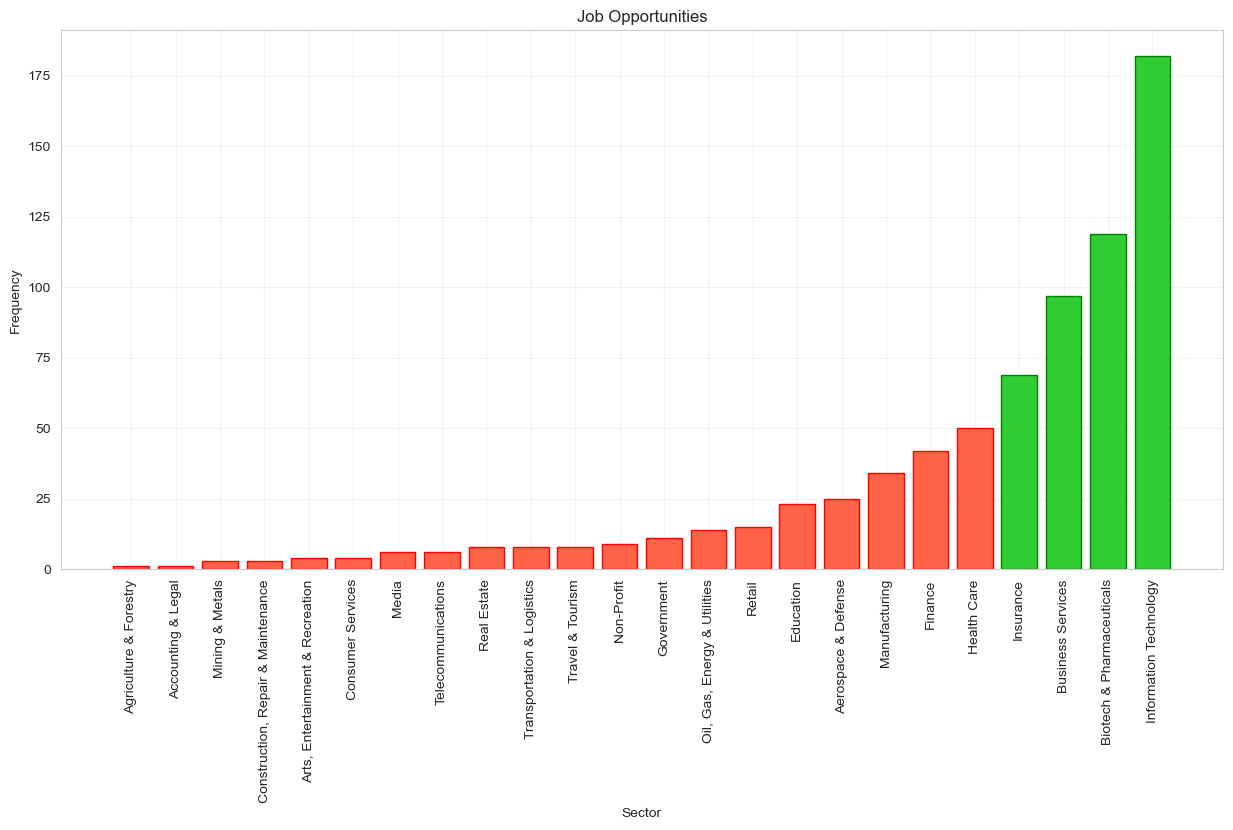

In [157]:
# ['job_state', 'job_region', 'Sector', 'Company_Age', 'Avg_Company_Size', 'Job_Title', 'Avg_Salary', 
# 'Max_Salary', 'Usr_Rating', 'Python_y_n', 'R_y_n', 'Spark_y_n', 'AWS_y_n', 'Excel_y_n']

val_count = glassdoor['Sector'].value_counts()  # Create dictionary (below) for y-axis values
cat_names = glassdoor['Sector'].unique()   # Create dictionary (below) for x-axis values

Sector_count = {cat: glassdoor['Sector'].value_counts()[cat] for cat in cat_names}
# print(Sector_count)
sorted_Sector_count = {r: Sector_count[r] for r in sorted(Sector_count, key=Sector_count.get, reverse=True)}
print(sorted_Sector_count, '\n')

plt.rcParams["figure.figsize"] = (15,7)

sorted_Sector_count_asc = dict(sorted(sorted_Sector_count.items(), key=lambda item: item[1]))
# plt.barh(list(sorted_Sector_count_asc.keys()), list(sorted_Sector_count_asc.values()), color = 'tomato', edgecolor = 'red')

plt.bar(sorted_Sector_count_asc.keys(), sorted_Sector_count_asc.values(), color = 'tomato', edgecolor = 'red')

# Color the top 4 bars in blue
for i, bar in enumerate(plt.gca().patches):
    if i > 19 and bar.get_height() > 60:
        bar.set_facecolor('limegreen')
        bar.set_edgecolor('green')
    
plt.ylabel("Frequency")
plt.xlabel("Sector")
plt.title("Job Opportunities")
plt.xticks(rotation = 90)
plt.grid(True, alpha = 0.25)
plt.savefig("..//Output_data//Fig4.png")
# plt.savefig("C:\A_Sheena\Cyber\Module_16Pj3\Project_3\Output_data\Fig4.png")
plt.show()



Sector name and its frequency in data:
{'Aerospace & Defense': 25, 'Health Care': 50, 'Business Services': 97, 'Oil, Gas, Energy & Utilities': 14, 'Real Estate': 8, 'Finance': 42, 'Information Technology': 182, 'Retail': 15, 'Biotech & Pharmaceuticals': 119, 'Media': 6, 'Insurance': 69, 'Transportation & Logistics': 8, 'Telecommunications': 6, 'Manufacturing': 34, 'Mining & Metals': 3, 'Government': 11, 'Education': 23, 'Agriculture & Forestry': 1, 'Travel & Tourism': 8, 'Non-Profit': 9, 'Arts, Entertainment & Recreation': 4, 'Construction, Repair & Maintenance': 3, 'Accounting & Legal': 1, 'Consumer Services': 4} 

Sector name and average salary from data:
{'Aerospace & Defense': 99.1, 'Health Care': 68.2, 'Business Services': 97.7, 'Oil, Gas, Energy & Utilities': 80.5, 'Real Estate': 104.8, 'Finance': 97.4, 'Information Technology': 113.0, 'Retail': 99.7, 'Biotech & Pharmaceuticals': 112.3, 'Media': 116.7, 'Insurance': 105.9, 'Transportation & Logistics': 99.3, 'Telecommunications':

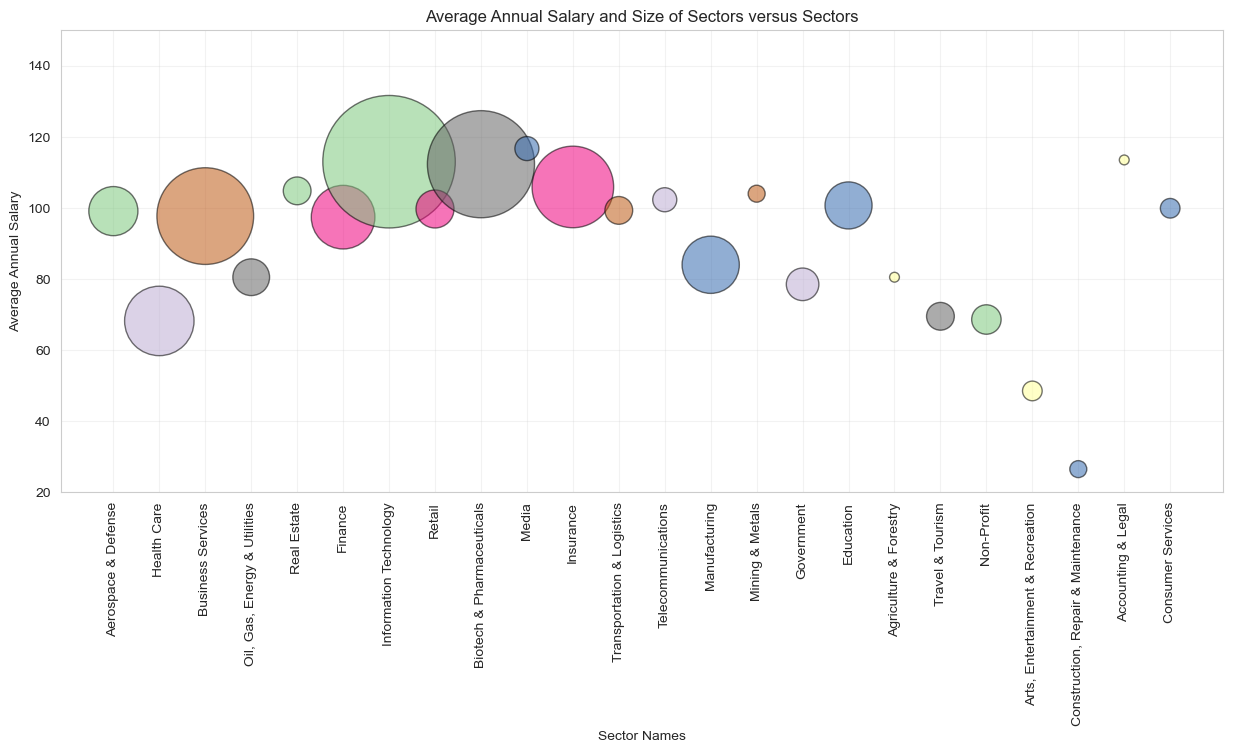

In [158]:
# ['job_state', 'job_region', 'Sector', 'Company_Age', 'Avg_Company_Size', 'Job_Title', 'Avg_Salary', 
# 'Max_Salary', 'Usr_Rating', 'Python_y_n', 'R_y_n', 'Spark_y_n', 'AWS_y_n', 'Excel_y_n']

avg_sal = round(glassdoor.groupby('Sector')['Avg_Salary'].mean(), 1)   # Create dictionary (below) for y-axis values
val_count = glassdoor['Sector'].value_counts()  # Create dictionary (below) using value_counts()
cat_names = glassdoor['Sector'].unique()

Sector_count = {cat: val_count[cat] for cat in cat_names}  # Dictionary
print()
print(f'Sector name and its frequency in data:\n{Sector_count} \n')
Sector_count_vals = [Sector_count[cat] for cat in Sector_count.keys()]
# print(Sector_count_vals)
scaled_Sector_count_vals = np.multiply(Sector_count_vals, 50)  # Scaled up by 50

Sector_Sal = {cat: (avg_sal[cat]) for cat in cat_names}
print(f'Sector name and average salary from data:\n{Sector_Sal} \n')

colors = np.random.rand(len(cat_names))
plt.rcParams["figure.figsize"] = (15,6)
plt.scatter(Sector_Sal.keys(), Sector_Sal.values(), s = scaled_Sector_count_vals, c = colors, cmap = 'Accent', edgecolors = 'k', alpha = 0.55)

plt.grid(True, alpha = 0.25)
plt.xlabel("Sector Names")
plt.ylabel("Average Annual Salary")
plt.ylim(ymin = 20, ymax = 150)

plt.title("Average Annual Salary and Size of Sectors versus Sectors")
plt.xticks(rotation=90)

plt.savefig("..//Output_data//Fig5.png")
plt.savefig("C:\A_Sheena\Cyber\Module_16Pj3\Project_3\Output_data\Fig5.png")
plt.show()

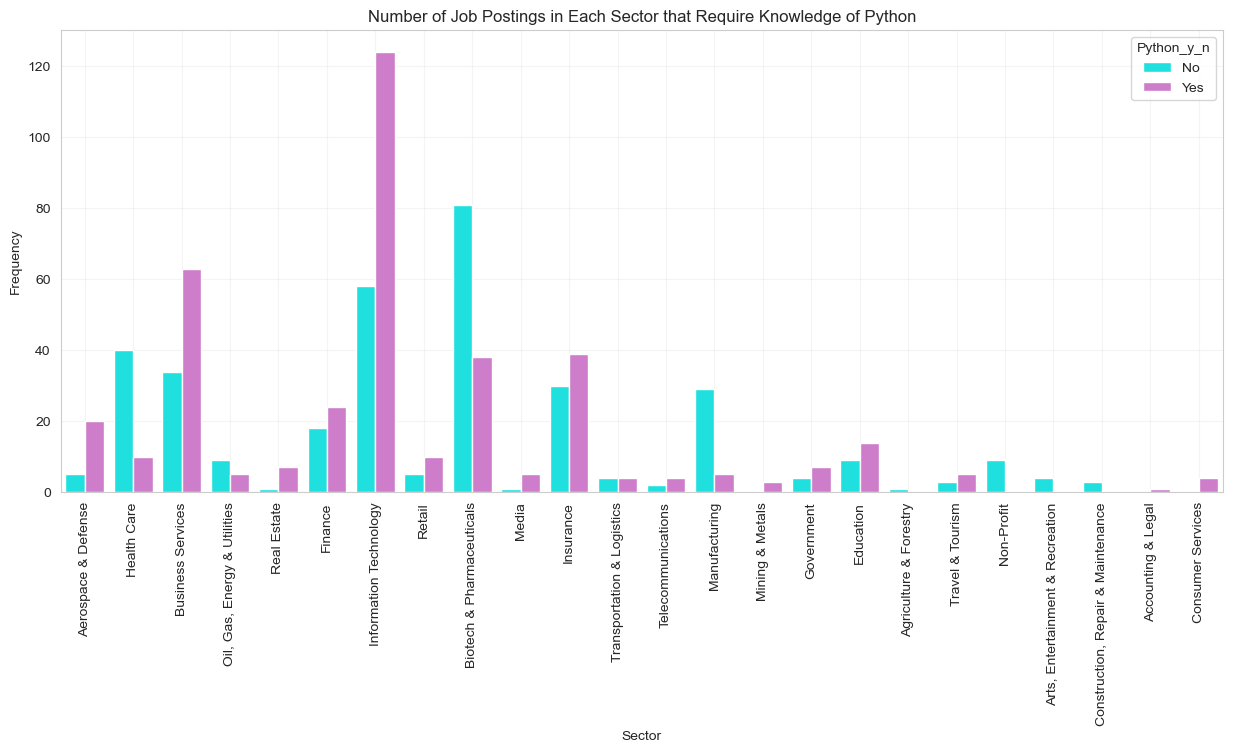

In [159]:
# ['job_state', 'job_region', 'Sector', 'Company_Age', 'Avg_Company_Size', 'Job_Title', 'Avg_Salary', 
# 'Max_Salary', 'Usr_Rating', 'Python_y_n', 'R_y_n', 'Spark_y_n', 'AWS_y_n', 'Excel_y_n']

sns.countplot(x = 'Sector', data = glassdoor, hue = 'Python_y_n', palette = sns.color_palette(('cyan', 'orchid')))

plt.rcParams["figure.figsize"] = (17,7)
plt.xticks(rotation=90)
plt.grid(alpha = 0.2)

plt.ylabel("Frequency")
plt.title("Number of Job Postings in Each Sector that Require Knowledge of Python")

legend_labels = plt.gca().get_legend().get_texts()
for label in legend_labels:
    label.set_text('No' if label.get_text() == '0' else 'Yes')
    
plt.savefig("..//Output_data//Fig6.png")    
# plt.savefig("C:\A_Sheena\Cyber\Module_16Pj3\Project_3\Output_data\Fig6.png")
plt.show()

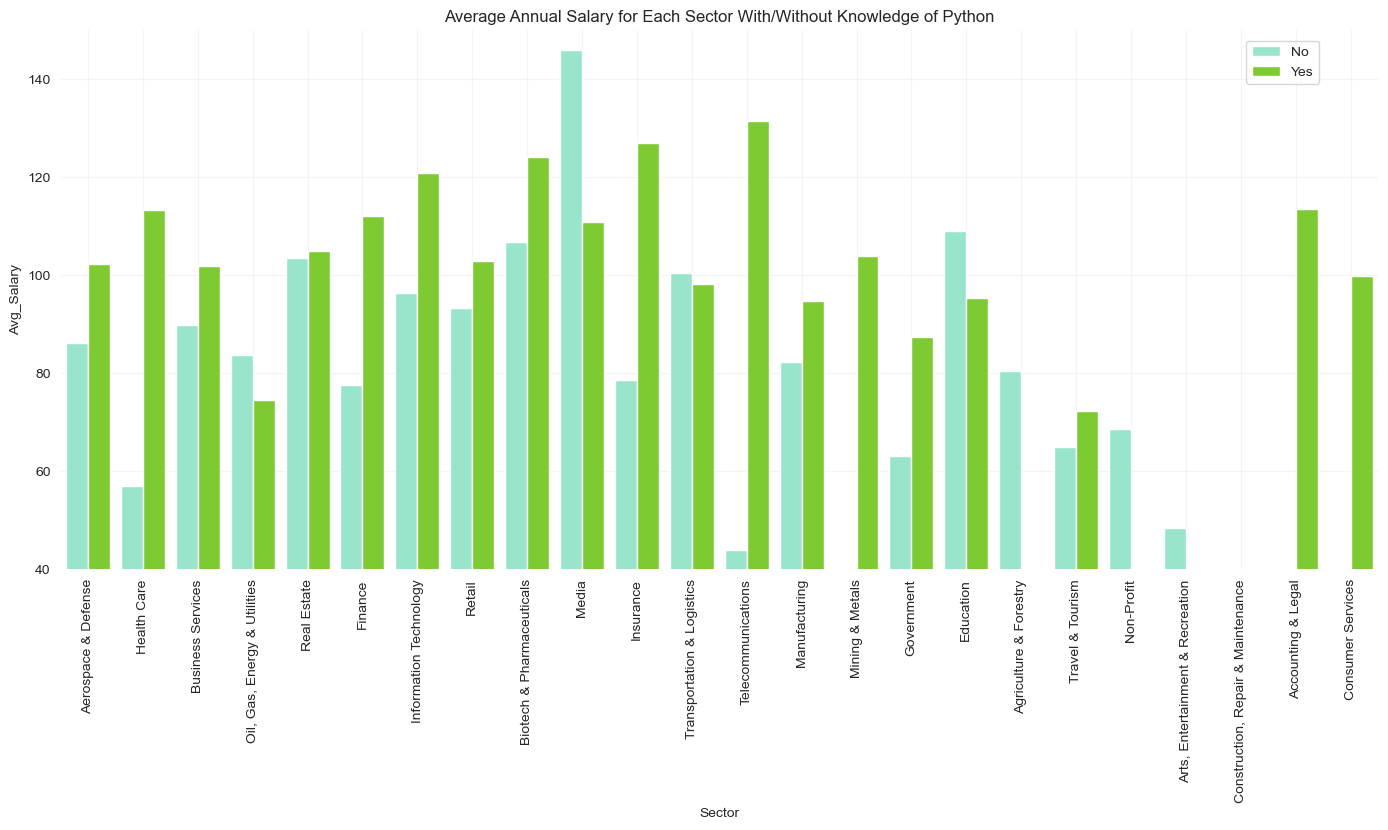

In [160]:
# ['job_state', 'job_region', 'Sector', 'Company_Age', 'Avg_Company_Size', 'Job_Title', 'Avg_Salary', 
# 'Max_Salary', 'Usr_Rating', 'Python_y_n', 'R_y_n', 'Spark_y_n', 'AWS_y_n', 'Excel_y_n']

bar_width = 0.6
sns.barplot(x='Sector', y='Avg_Salary', hue='Python_y_n', palette = sns.color_palette(('aquamarine', 'lawngreen')), errorbar = None, data = glassdoor, saturation=bar_width)

sns.set_style('whitegrid')
sns.despine(left=True, bottom=True)

plt.rcParams["figure.figsize"] = (17,7)
plt.grid(alpha = 0.2)
plt.legend(loc = (.9, 0.9))
plt.title("Average Annual Salary for Each Sector With/Without Knowledge of Python")

plt.ylim(40, 150)

legend_labels = plt.gca().get_legend().get_texts()
for label in legend_labels:
    label.set_text('No' if label.get_text() == '0' else 'Yes')
plt.xticks(rotation=90)

plt.savefig("..//Output_data//Fig7.png")
# plt.savefig("C:\A_Sheena\Cyber\Module_16Pj3\Project_3\Output_data\Fig7.png")
plt.show()

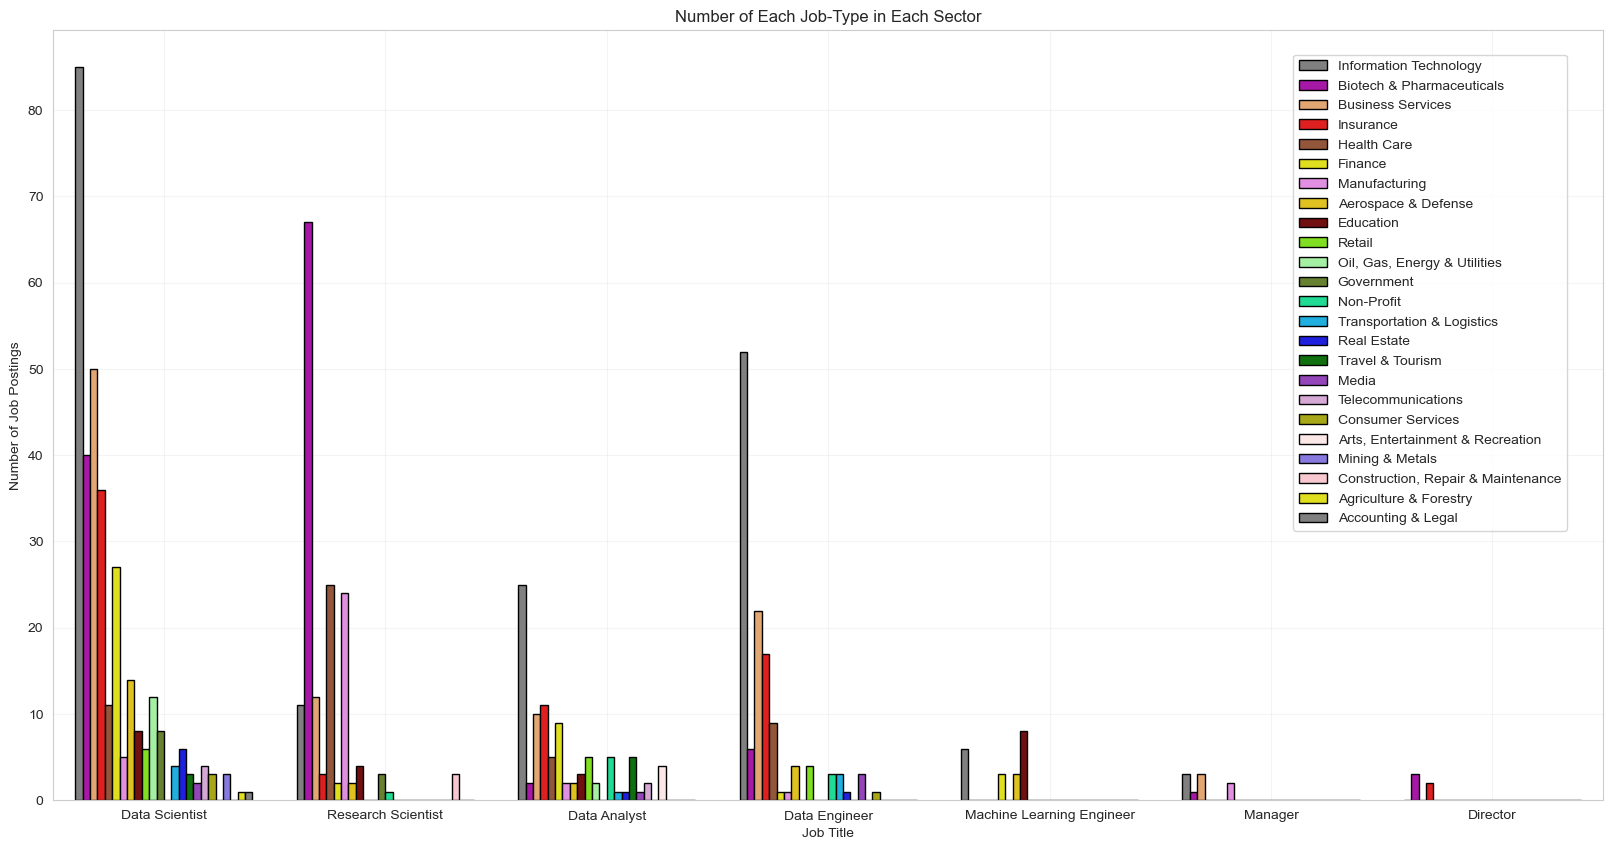

In [161]:
# ['job_state', 'job_region', 'Sector', 'Company_Age', 'Avg_Company_Size', 'Job_Title', 'Avg_Salary', 
# 'Max_Salary', 'Usr_Rating', 'Python_y_n', 'R_y_n', 'Spark_y_n', 'AWS_y_n', 'Excel_y_n']


# count job titles within each sector
sector_job_counts = glassdoor.groupby(['Sector', 'Job_Title']).size().unstack(fill_value=0)

# Sort the data by total job counts within each sector in descending order
sorted_sectors = sector_job_counts.sum(axis=1).sort_values(ascending=False).index

plt.figure(figsize=(20,10))

# Create the countplot with the sorted sectors
sns.countplot(x='Job_Title', data=glassdoor, hue='Sector', edgecolor='k',
              palette=sns.color_palette(('gray', 'm', 'sandybrown', 'red', 'sienna',
                                         'yellow', 'violet', 'gold', 'maroon', 'chartreuse', 'palegreen',
                                         'olivedrab', 'mediumspringgreen', 'deepskyblue', 'blue', 'g',
                                         'darkorchid', 'plum', 'y', 'mistyrose', 'mediumslateblue', 'pink', 'yellow'),
                            n_colors=len(sorted_sectors)),
              hue_order=sorted_sectors)

plt.legend(loc=(0.8, 0.35))
plt.xlabel("Job Title")
plt.ylabel("Number of Job Postings")
plt.title("Number of Each Job-Type in Each Sector")
plt.grid(True, alpha=0.2)

plt.savefig("..//Output_data//Fig8.png")
# plt.savefig("C:\A_Sheena\Cyber\Module_16Pj3\Project_3\Output_data\Fig8.png")
plt.show()

{'mean': 3.7, 'median': 3.7, 'mode': 3.9, '-3 std': 1.9, '-2 std': 2.5, '-1 std': 3.1, '1 std': 4.3, '2 std': 4.9} 



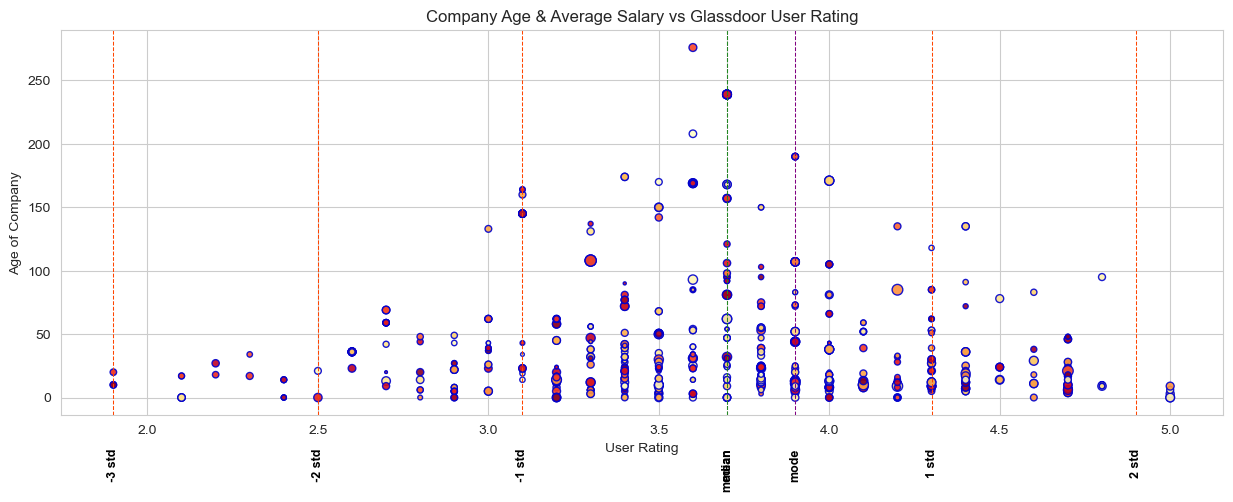

In [162]:
# ['job_state', 'job_region', 'Sector', 'Company_Age', 'Avg_Company_Size', 'Job_Title', 'Avg_Salary', 
# 'Max_Salary', 'Usr_Rating', 'Python_y_n', 'R_y_n', 'Spark_y_n', 'AWS_y_n', 'Excel_y_n']

mask = glassdoor['Usr_Rating'] > 0

if mask.any():
    plt.rcParams["figure.figsize"] = (15, 5)
    dot_size = np.multiply(glassdoor[mask]['Avg_Salary'], 0.25)
    # glassdoor[mask].plot(kind='scatter', x='Usr_Rating', y='Company_Age', color='dodgerblue', cmap = 'YlGnBu', edgecolor='b', title='Glassdoor User Rating Vs Company Age')
    colors = np.random.rand(len(glassdoor[mask]['Sector']))
    # glassdoor[mask].plot(kind='scatter', x='Usr_Rating', y='Company_Age', s = dot_size, c = colors, cmap = 'YlOrRd', edgecolor='b', title='Company Age & Average Salary vs Glassdoor User Rating')
    plt.scatter(
    glassdoor[mask]['Usr_Rating'],
    glassdoor[mask]['Company_Age'],
    s=dot_size,
    c=colors,
    cmap='YlOrRd',    
    edgecolor='mediumblue',
    linewidths=1.0,  # Adjust the value as needed
    alpha=0.9
    )
    plt.xlabel("User Rating")
    plt.ylabel("Age of Company")
    plt.title('Company Age & Average Salary vs Glassdoor User Rating')

    
    filtered_rating = glassdoor[mask]
    mean = round(filtered_rating['Usr_Rating'].mean(), 1)
    median = round(filtered_rating['Usr_Rating'].median(), 1)
    mode = round(filtered_rating['Usr_Rating'].mode(), 1)
    std = round(filtered_rating['Usr_Rating'].std(), 1)

    # print(f'Mean: {mean}, Median: {median}, Mode: {mode[0]}, Standard Deviation: {std}')

    stat_param = {'mean': mean, 'median': median, 'mode': mode[0]}
    
    for i in range(-4, 2):
        if (i + 1) == 0:
            continue
        else:
            new_val = (mean + (i + 1) * std).round(1)
            new_key = f'{i + 1} std'
            stat_param[new_key] = new_val
    print(stat_param, '\n')

    ln_clr = ['black', 'forestgreen', 'purple', 'orangered', 'orangered', 'orangered', 'orangered', 'orangered', 'orangered']

    for i, (k, v) in enumerate(stat_param.items()):
        plt.axvline(v, color=ln_clr[i], linestyle='dashed', lw=0.75)
        plt.text(v, -40, k, color='k', ha='center', va='top', rotation=90, fontsize=9, weight='bold')

plt.savefig("..//Output_data//Fig9.png")
# plt.savefig("C:\A_Sheena\Cyber\Module_16Pj3\Project_3\Output_data\Fig9.png")
plt.show()



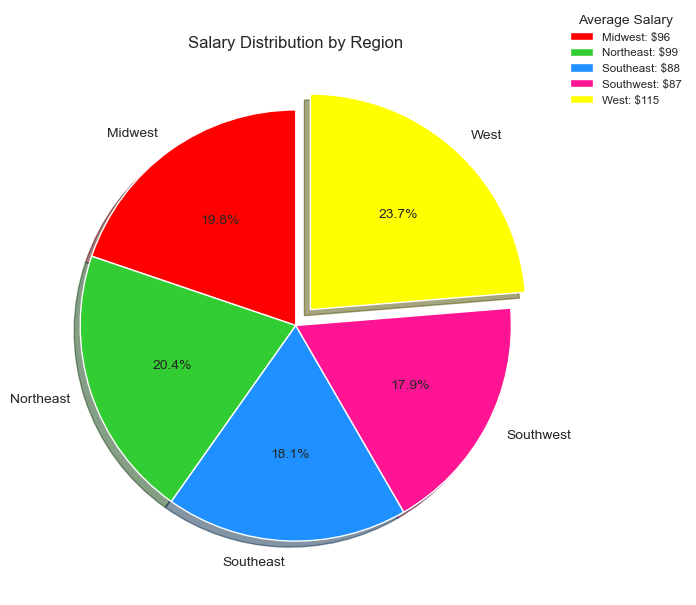

In [163]:
# ['job_state', 'job_region', 'Sector', 'Company_Age', 'Avg_Company_Size', 'Job_Title', 'Avg_Salary', 
# 'Max_Salary', 'Usr_Rating', 'Python_y_n', 'R_y_n', 'Spark_y_n', 'AWS_y_n', 'Excel_y_n']

Region_Salary = glassdoor.groupby('job_region')['Avg_Salary'].mean().round(0)
# print(Region_Salary, '\n\n')
job_regions = ['Midwest', 'Northeast', 'Southeast', 'Southwest', 'West']

plt.rcParams["figure.figsize"] = (7, 7)
plt.pie(Region_Salary.tolist(),
        labels = job_regions,
        colors = ['r', 'limegreen', 'dodgerblue', 'deeppink', 'yellow'],
        startangle = 90, shadow = True, explode = (0, 0, 0, 0, 0.1), autopct = '%1.1f%%')

plt.legend(
    labels=[f'{region}: ${salary:.0f}' for region, salary in zip(job_regions, Region_Salary)],
    edgecolor = 'white',
    loc = (1.0, 0.9),
    title='Average Salary',
    fontsize='small'
)
plt.title("Salary Distribution by Region")

plt.savefig("..//Output_data//Fig10.png")
# plt.savefig("C:\A_Sheena\Cyber\Module_16Pj3\Project_3\Output_data\Fig10.png")
plt.show()

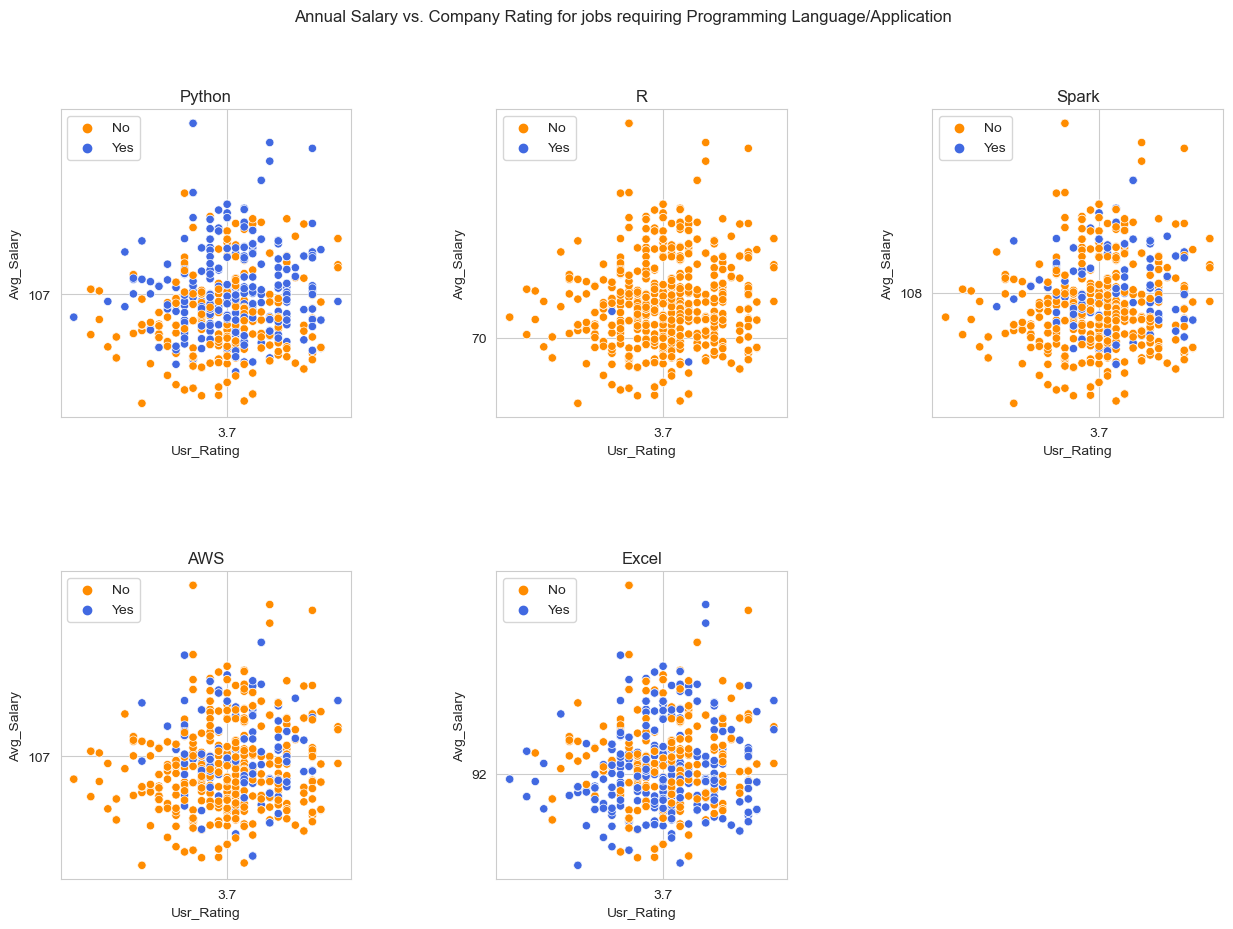

In [164]:
# ['job_state', 'job_region', 'Sector', 'Company_Age', 'Avg_Company_Size', 'Job_Title', 'Avg_Salary', 
# 'Max_Salary', 'Usr_Rating', 'Python_y_n', 'R_y_n', 'Spark_y_n', 'AWS_y_n', 'Excel_y_n']

lang_list = ['Python_y_n', 'R_y_n', 'Spark_y_n', 'AWS_y_n', 'Excel_y_n']
header_list = ['Python', 'R', 'Spark', 'AWS', 'Excel']


def language(lang, title, ax):

    count0 = glassdoor[lang].value_counts()[0]
    count1 = glassdoor[lang].value_counts()[1]
    if count0 > count1:
          color_palette = {0: 'darkorange', 1: 'royalblue'}
    else:
          color_palette = {0: 'darkorange', 1: 'royalblue'}

    mask = glassdoor['Usr_Rating'] > 0
    if mask.any():
        plot = sns.scatterplot(x = 'Usr_Rating', y='Avg_Salary', data = glassdoor[mask], hue = lang, palette = color_palette, ax = ax)
    
    if plot.get_legend():
        legend_labels = plot.get_legend().get_texts()
        for label in legend_labels:
            label.set_text('No' if label.get_text() == '0' else 'Yes')
        plot.get_legend().set_title('')
    
    gldr_lang = glassdoor[glassdoor[lang].isin([1])]
    gldr_lang_sal = int(gldr_lang.Avg_Salary.median())
    # print(f'Median Salary with knowledge of {title}: ${gldr_lang_sal}k')
    plot.set_yticks([gldr_lang_sal])
    plot.set_xticks([3.7])
    plot.set_title(title)

fig, axs = plt.subplots(nrows = 2, ncols = 3, figsize = (15, 10))
fig.suptitle('Annual Salary vs. Company Rating for jobs requiring Programming Language/Application')
fig.subplots_adjust(hspace = 0.5, wspace = 0.5)

i = j = counter = 0
for l in range(len(lang_list)):
    language(lang_list[l], header_list[l], axs[i][j])
    j += 1
    counter += 1
    if counter > 4:
        plt.delaxes(axs[i][j])
        break

    if j > 2:
        i += 1; j = 0

plt.savefig("..//Output_data//Fig11.png")
# plt.savefig("C:\A_Sheena\Cyber\Module_16Pj3\Project_3\Output_data\Fig11.png")


Median Salary with knowledge of Python: $107k
Median Salary with knowledge of R: $70k
Median Salary with knowledge of Spark: $108k
Median Salary with knowledge of AWS: $107k
Median Salary with knowledge of Excel: $92k


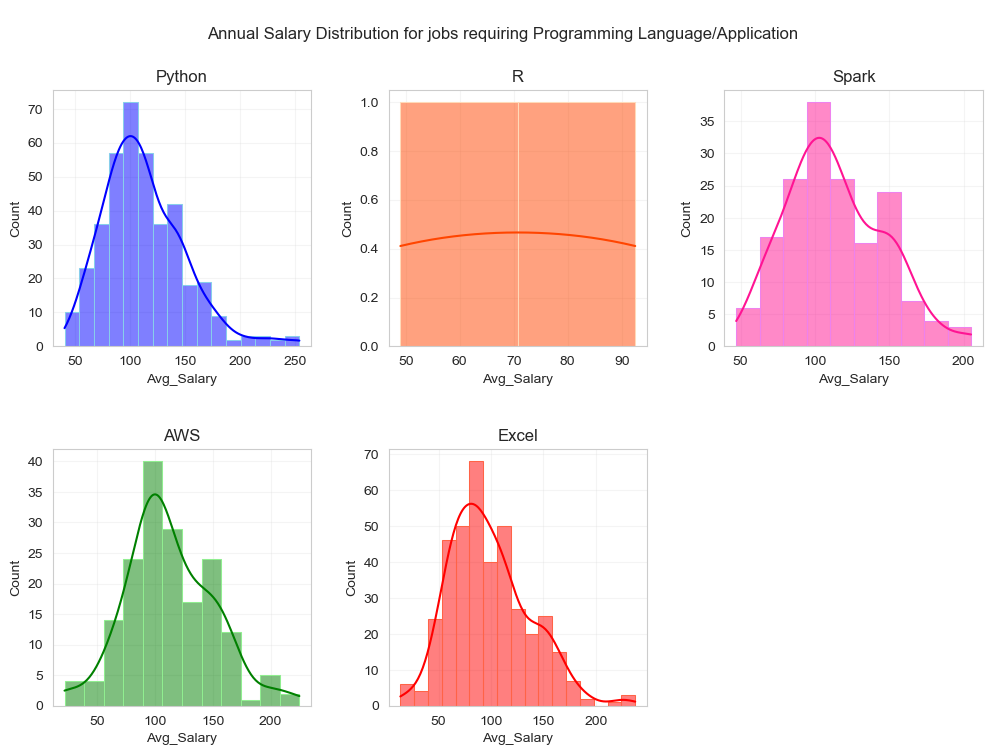

In [165]:
# ['job_state', 'job_region', 'Sector', 'Company_Age', 'Avg_Company_Size', 'Job_Title', 'Avg_Salary', 
# 'Max_Salary', 'Usr_Rating', 'Python_y_n', 'R_y_n', 'Spark_y_n', 'AWS_y_n', 'Excel_y_n']

lng = ['Python_y_n', 'R_y_n', 'Spark_y_n', 'AWS_y_n', 'Excel_y_n']  # Column names of Languages
ln_c = ['blue', 'orangered', 'deeppink', 'green', 'red']  #  Line and fill color
eg_c = ['skyblue', 'peachpuff', 'violet', 'lightgreen', 'tomato']  #  Edge color
header = ['Python', 'R', 'Spark', 'AWS', 'Excel']  #  Language names in Titles

def language(lang, lin_c, edg_c, title, ax):
    gldr_lang = glassdoor[glassdoor[lang].isin([1])]
    gldr_lang_sal = int(gldr_lang.Avg_Salary.median())
    print(f'Median Salary with knowledge of {title}: ${gldr_lang_sal}k')
    sns.histplot(x = 'Avg_Salary', data = gldr_lang, kde=True, lw=0.75, color=lin_c, edgecolor=edg_c, ax = ax)
    # ax.set_xticks([gldr_lang_sal])
    ax.grid(True, alpha = 0.2)
    ax.set_title(title)

fig, axs = plt.subplots(nrows = 2, ncols = 3, figsize = (12, 8))
fig.suptitle('\nAnnual Salary Distribution for jobs requiring Programming Language/Application')
fig.subplots_adjust(hspace = 0.4, wspace = 0.3)

i = j = counter = 0

for l in range(len(lng)):
    language(lng[l], ln_c[l], eg_c[l], header[l], axs[i][j])
    j += 1
    counter += 1
    if counter > 4:
        plt.delaxes(axs[i][j])
        break

    if j > 2:
        i += 1; j = 0

plt.savefig("..//Output_data//Fig12.png")
# plt.savefig("C:\A_Sheena\Cyber\Module_16Pj3\Project_3\Output_data\Fig12.png")


{'Spark': 113.3, 'Python': 112.7, 'AWS': 112.6, 'Excel': 98.5, 'R': 70.8} 



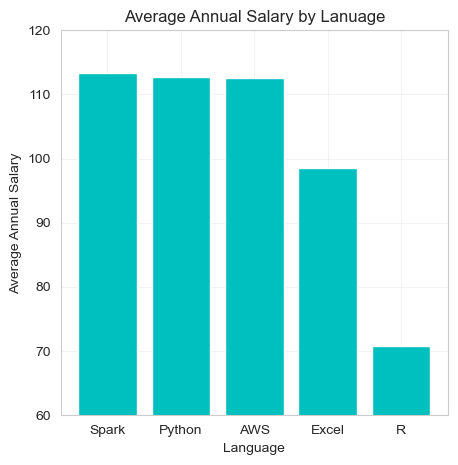

In [166]:
# ['job_state', 'job_region', 'Sector', 'Company_Age', 'Avg_Company_Size', 'Job_Title', 'Avg_Salary', 
# 'Max_Salary', 'Usr_Rating', 'Python_y_n', 'R_y_n', 'Spark_y_n', 'AWS_y_n', 'Excel_y_n']

lang_list = ['Python_y_n', 'R_y_n', 'Spark_y_n', 'AWS_y_n', 'Excel_y_n']
lang_names = ['Python', 'R', 'Spark', 'AWS', 'Excel']

lang_Sal = {}
for i in range(len(lang_list)):    
      lang_Y = round(glassdoor.loc[glassdoor[lang_list[i]] == 1].groupby(glassdoor[lang_list[i]])['Avg_Salary'].mean(), 1)
      lang_Y = lang_Y.values[0]   # Prints  array([112.0]); extract the 1st value of array
      lang = lang_names[i] 

      lang_Sal[lang] = lang_Y  # Adding element to dictionary

# print(lang_Sal)
sorted_lang_Sal = {r: lang_Sal[r] for r in sorted(lang_Sal, key = lang_Sal.get, reverse=True)}
print(sorted_lang_Sal, '\n')

plt.rcParams["figure.figsize"] = (5,5)

plt.bar(sorted_lang_Sal.keys(), sorted_lang_Sal.values(), color = 'c')


plt.xlabel("Language")
plt.ylabel("Average Annual Salary")
plt.ylim(ymin = 60, ymax = 120)
plt.title("Average Annual Salary by Lanuage")
plt.grid(True, alpha=0.25)

plt.savefig("..//Output_data//Fig13.png")
plt.savefig("C:\A_Sheena\Cyber\Module_16Pj3\Project_3\Output_data\Fig13.png")
plt.show()

{'0': 127.0, '10000': 112.2, '125': 111.4, '25': 102.3, '350': 100.2, '7500': 96.6, '3000': 92.9, '750': 90.8} 



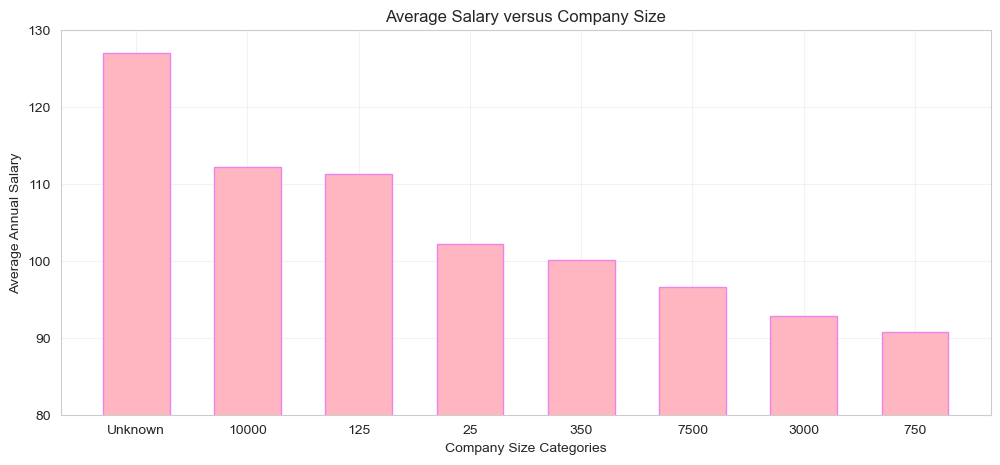

In [167]:
# ['job_state', 'job_region', 'Sector', 'Company_Age', 'Avg_Company_Size', 'Job_Title', 'Avg_Salary', 
# 'Max_Salary', 'Usr_Rating', 'Python_y_n', 'R_y_n', 'Spark_y_n', 'AWS_y_n', 'Excel_y_n']

glassdoor['Avg_Company_Size'] = glassdoor['Avg_Company_Size'].astype(str)
emp_nums = glassdoor['Avg_Company_Size'].unique()  # x-values

for i in range(len(emp_nums)):   # y-values
      Sal_Avg = round(glassdoor.groupby('Avg_Company_Size')['Avg_Salary'].mean(), 1)  # Create dictionary (below) using value_counts()

Emp_Sal = {emp: Sal_Avg[emp] for emp in emp_nums}

sorted_Emp_Sal = {r: Emp_Sal[r] for r in sorted(Emp_Sal, key=Emp_Sal.get, reverse=True)}
print(sorted_Emp_Sal, '\n')

xtick_labels = list(sorted_Emp_Sal.keys())
xtick_labels = ['Unknown' if label == '0' else label for label in xtick_labels]

plt.rcParams["figure.figsize"] = (12,5)
plt.bar(xtick_labels, sorted_Emp_Sal.values(), width = 0.6, color = 'lightpink', edgecolor = 'violet')

plt.xlabel("Company Size Categories")
plt.ylabel("Average Annual Salary")
plt.title("Average Salary versus Company Size")
plt.grid(True, alpha=0.25)
plt.ylim(ymin = 80, ymax = 130)

plt.savefig("..//Output_data//Fig14.png")
# plt.savefig("C:\A_Sheena\Cyber\Module_16Pj3\Project_3\Output_data\Fig14.png")
plt.show()


In [168]:
# Step 5.  Close connection
connection.close()